In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

sys.path.append('../../../common_code')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd

channelColorDict_lighter = {'classic':adjust_lightness(color='#118AB2', amount=1.6),'stable B no CEE':adjust_lightness(color='orange', amount=1.4), 'immediate CE':adjust_lightness(color='#EF476F', amount=1.2),\
                            r'double-core CE':adjust_lightness(color='#073B4C', amount=1.8), 'other':adjust_lightness(color='gray', amount=1.5),  'vi':adjust_lightness(color='cyan', amount=1.5), 'vii':adjust_lightness(color='#FFD166', amount=1.2)}
channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #, 'vi']
#######

In [36]:
print(colorDirDict)

{'A': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), 'B': (0.9704241569984234, 0.4603475375001678, 0.3099359864545268), 'C': (0.8616090647292522, 0.536495730113334, 0.19548899031476086), 'D': (0.7632105624545802, 0.5838460616396939, 0.19465686802007026), 'E': (0.6804189127793346, 0.6151497514677574, 0.19405452111445337), 'F': (0.5920891529639701, 0.6418467016378244, 0.1935069134991043), 'G': (0.46810256823426105, 0.6699492535792404, 0.1928958739904499), 'H': (0.19316929744982803, 0.7018418078239693, 0.24321388407365968), 'I': (0.20125317221201128, 0.6907920815379025, 0.47966761189275336), 'J': (0.20631516405196249, 0.6834948167725491, 0.5761817437653648), 'K': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), 'L': (0.21461147568939787, 0.6708637556281021, 0.7042594890626992), 'M': (0.2197995660828324, 0.6625157876850336, 0.7732093159317209), 'N': (0.22829030785596155, 0.6480515334381642, 0.8744997507366618), 'O': (0.433280341176423, 0.6065273407962815, 0.95

at xparam  mass_1_LVK
at DCOtype = BBH


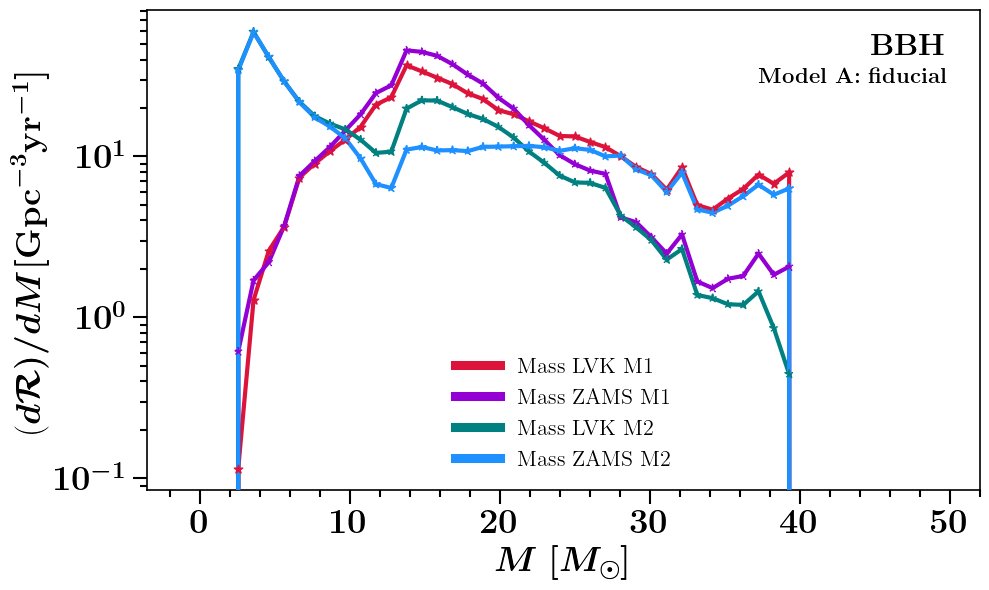


at DCOtype = BBH


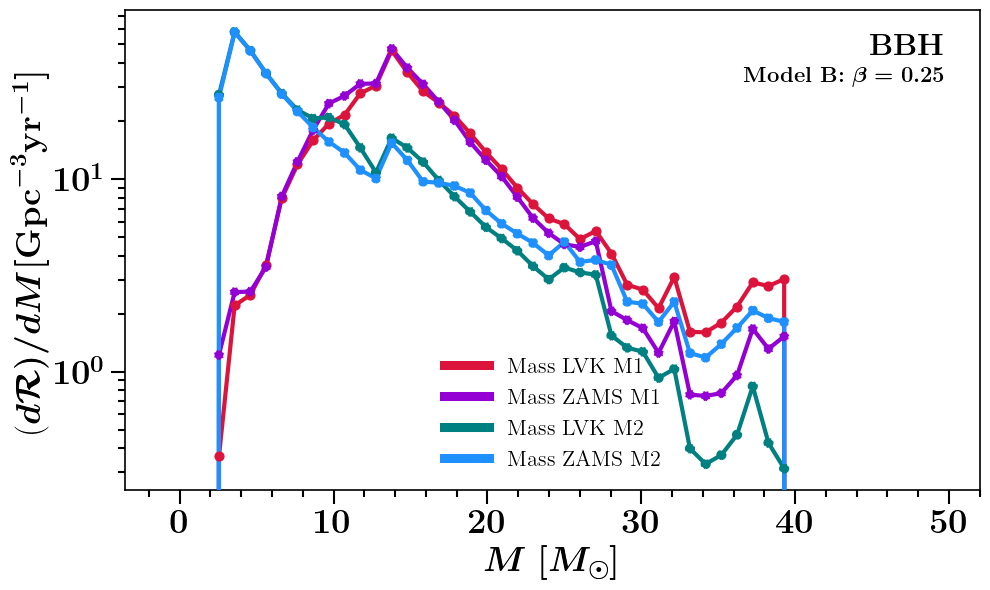


at DCOtype = BBH


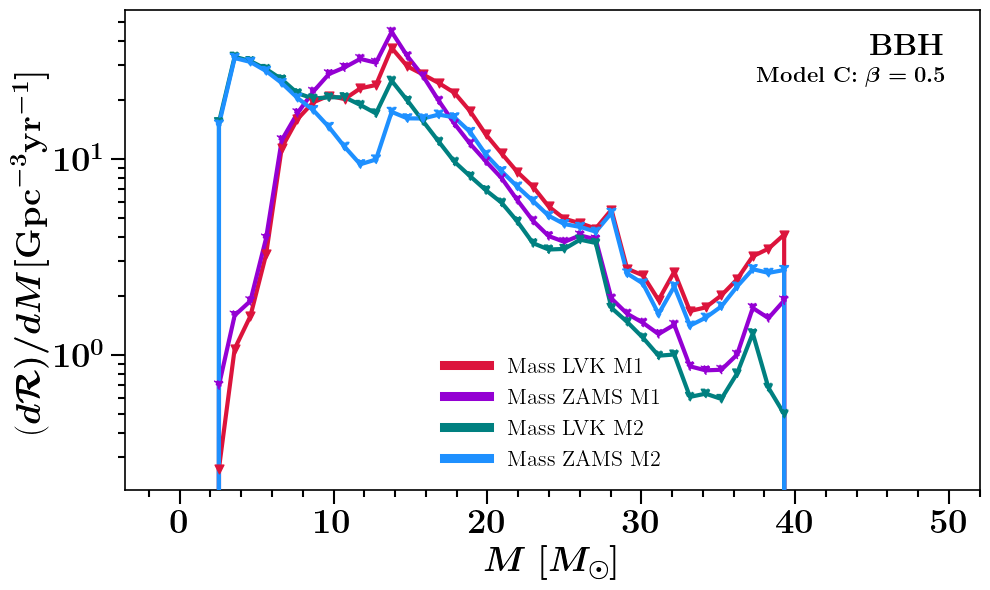


at DCOtype = BBH


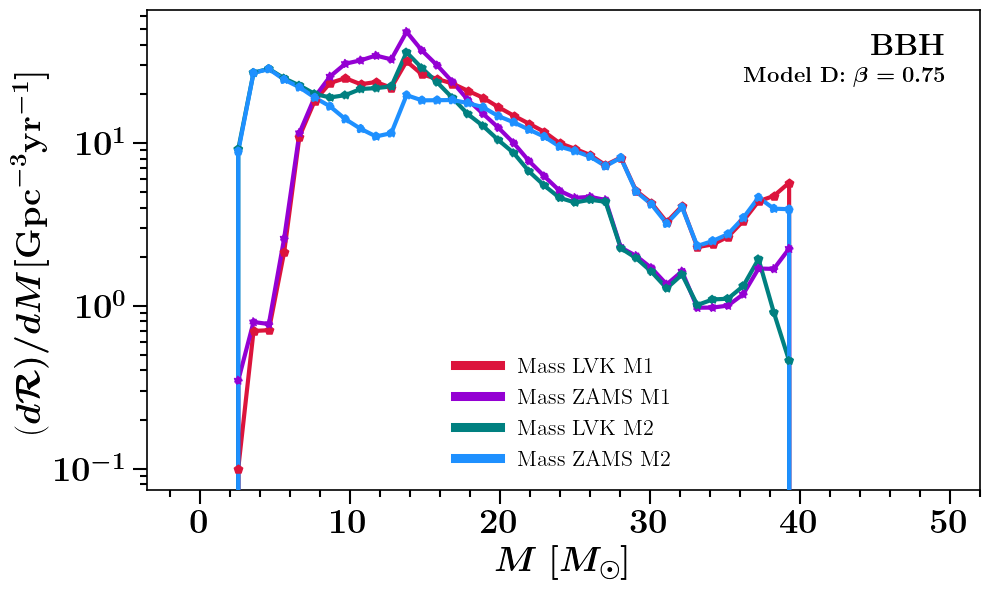


at DCOtype = BBH


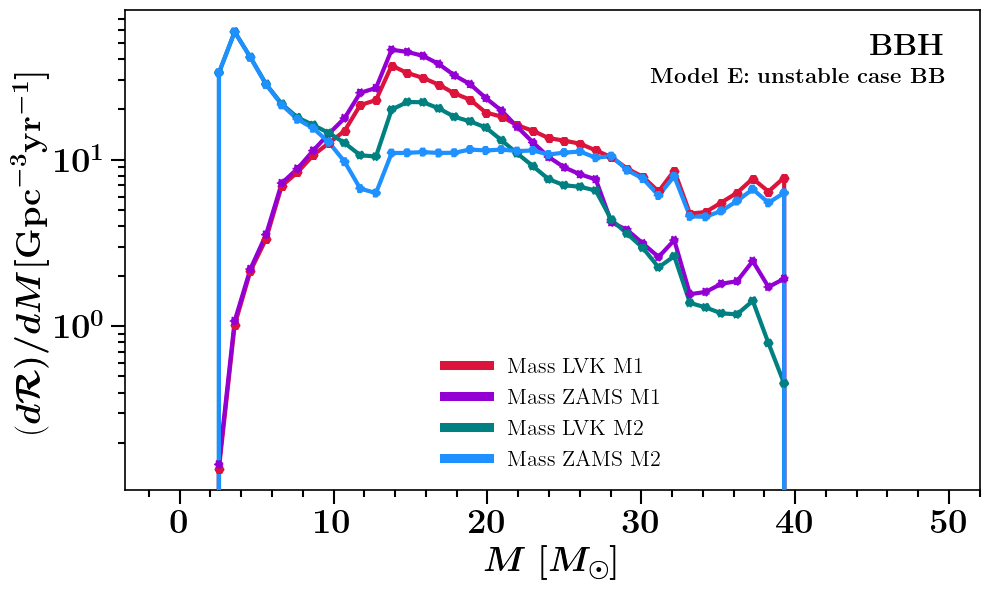


at DCOtype = BBH


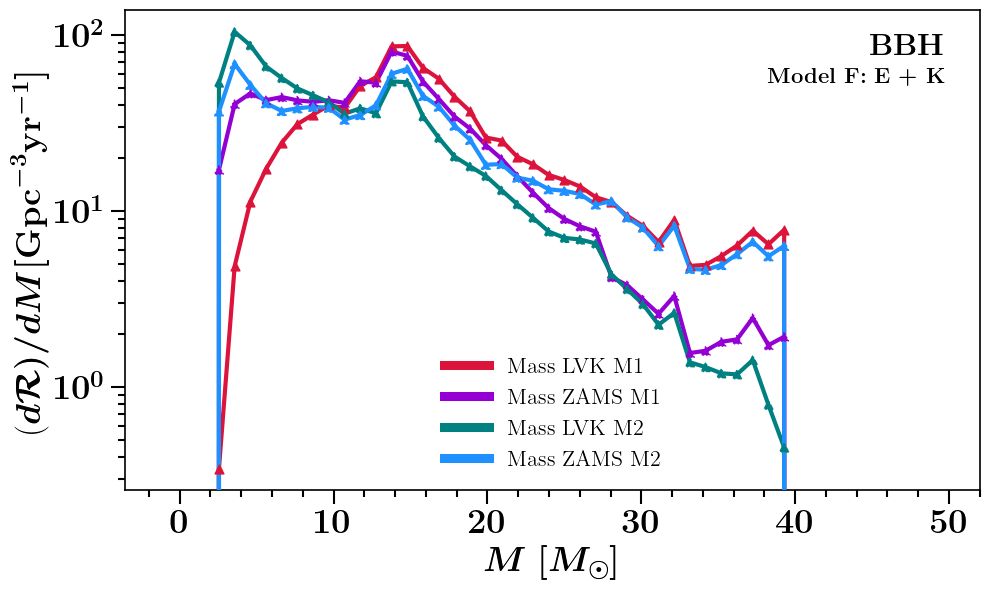


at DCOtype = BBH


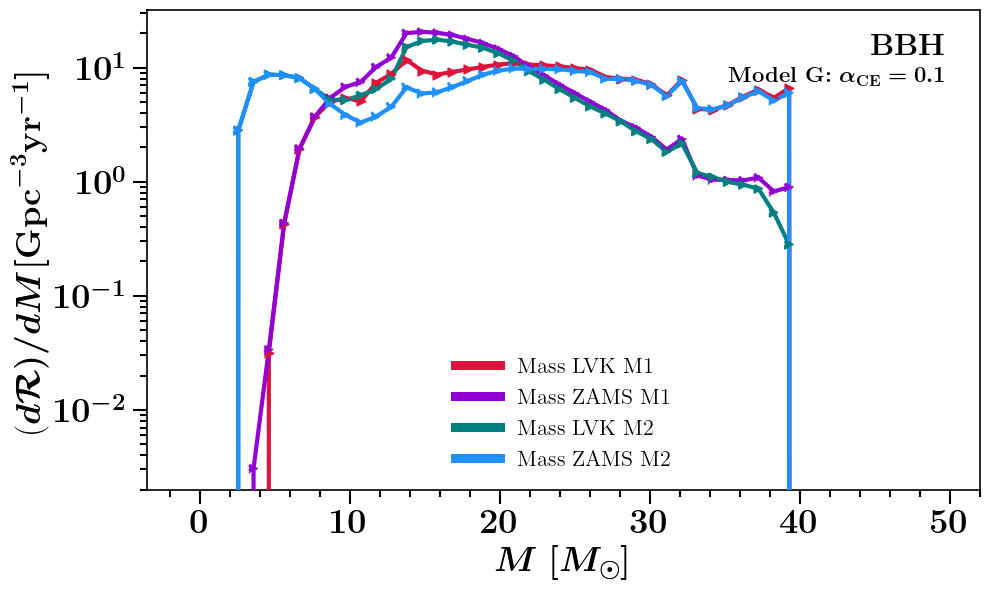


at DCOtype = BBH


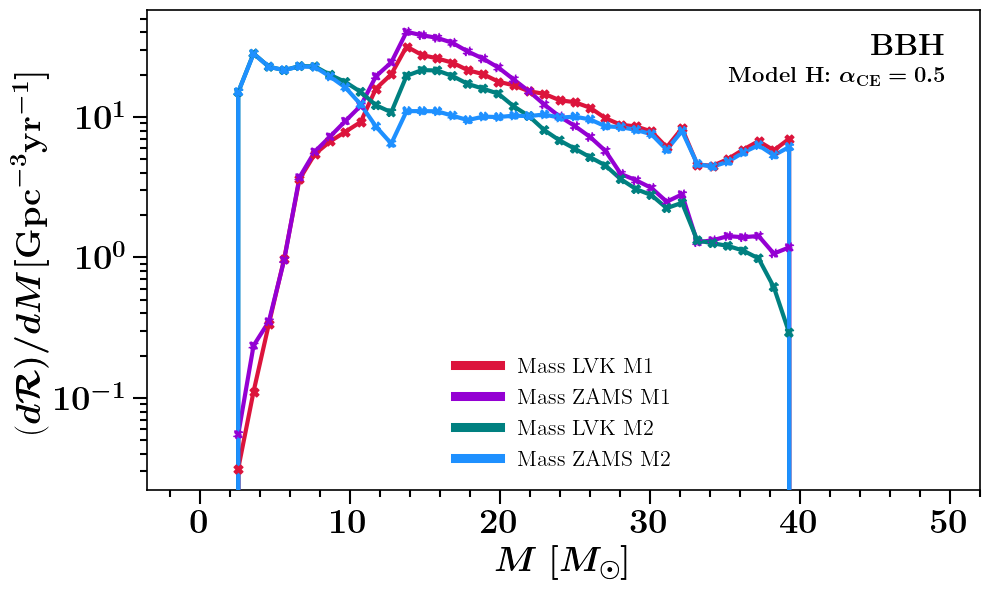


at DCOtype = BBH


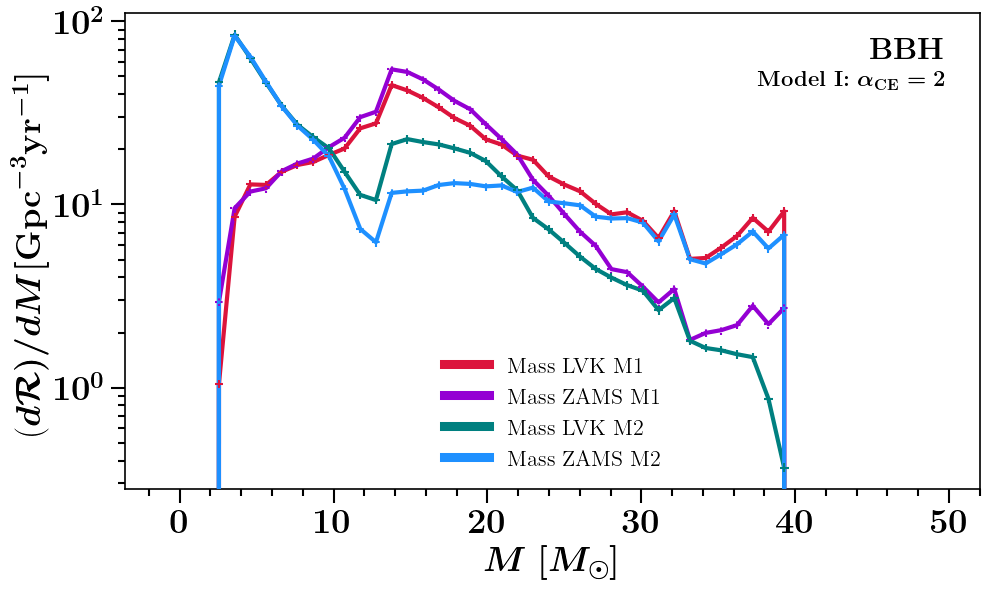


at DCOtype = BBH


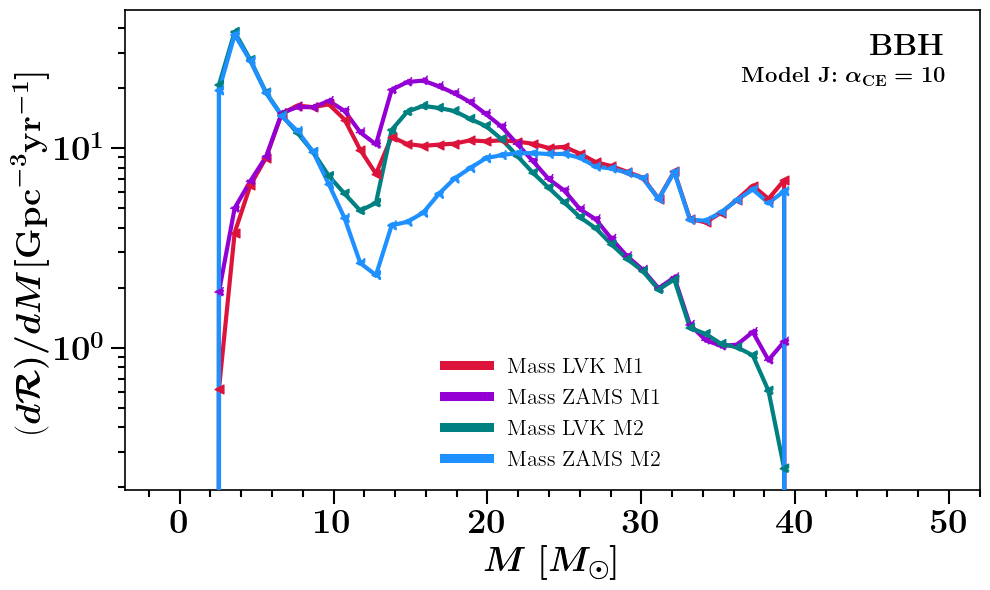


at DCOtype = BBH


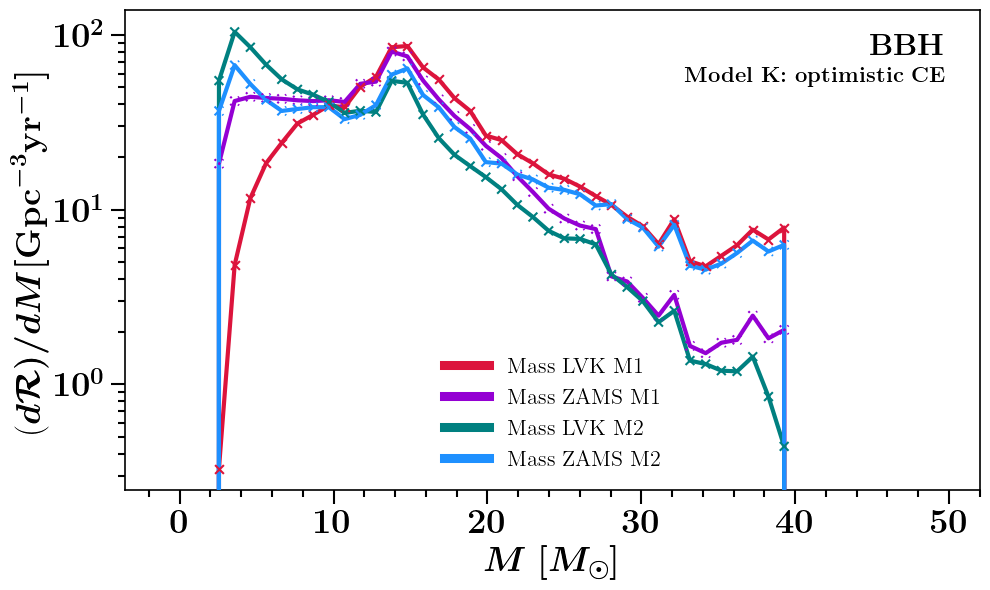


at DCOtype = BBH


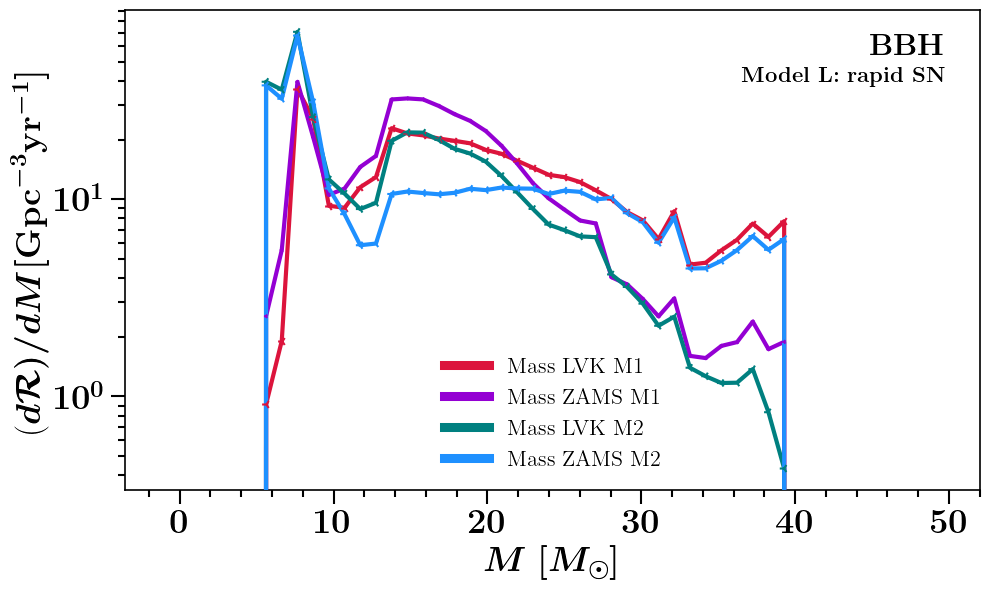


at DCOtype = BBH


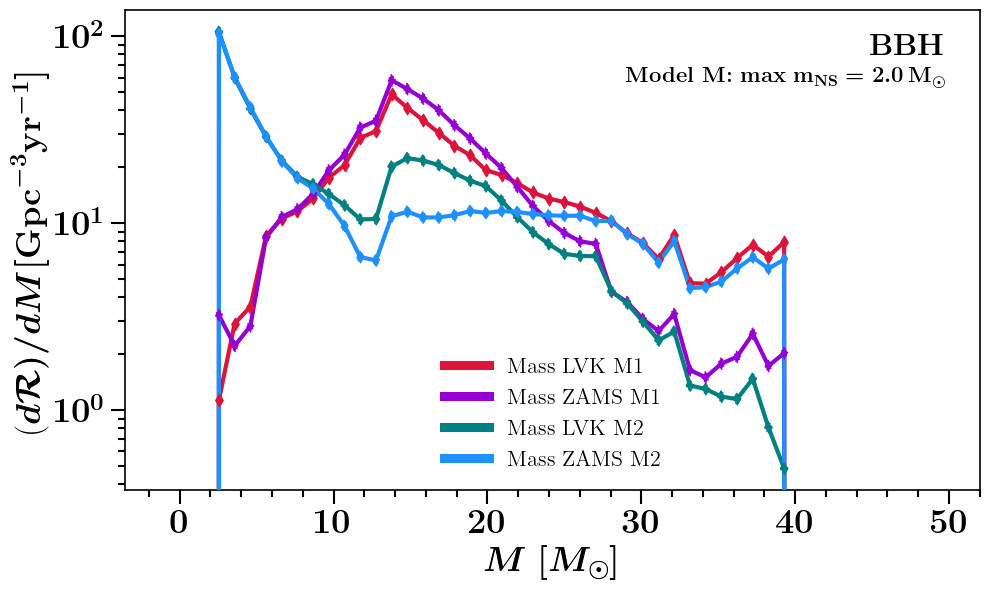


at DCOtype = BBH


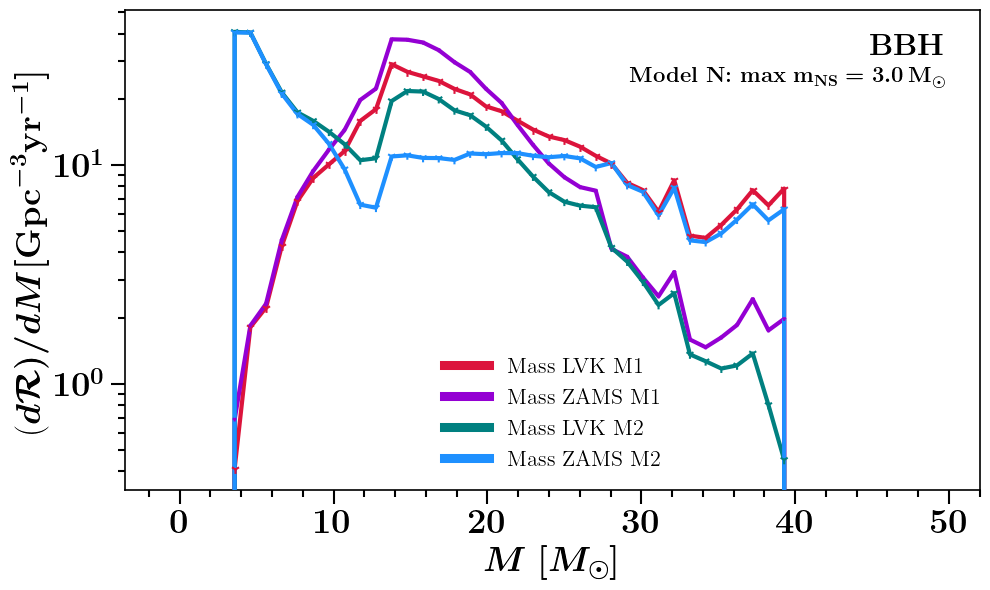


at DCOtype = BBH


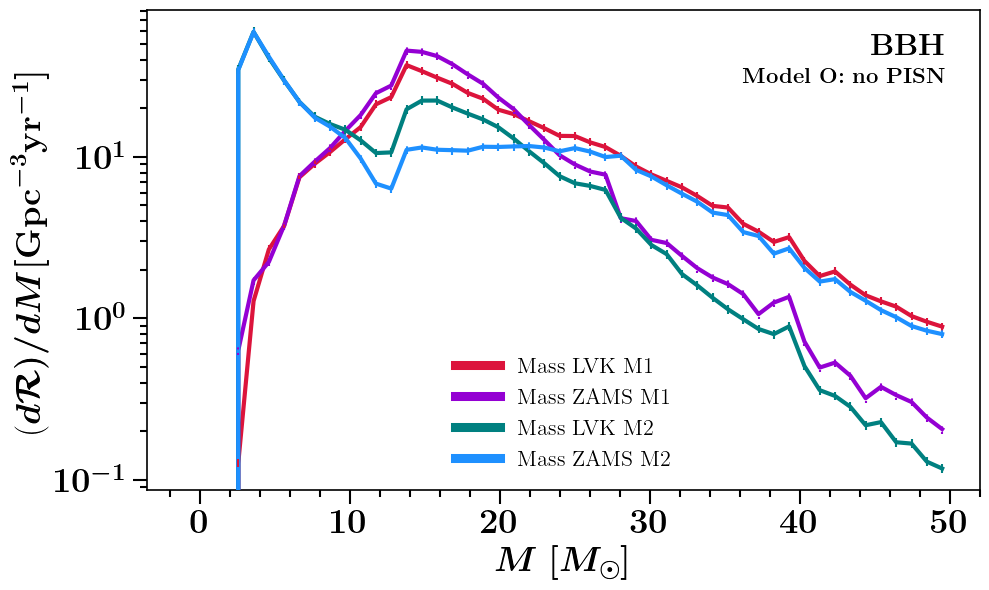


at DCOtype = BBH


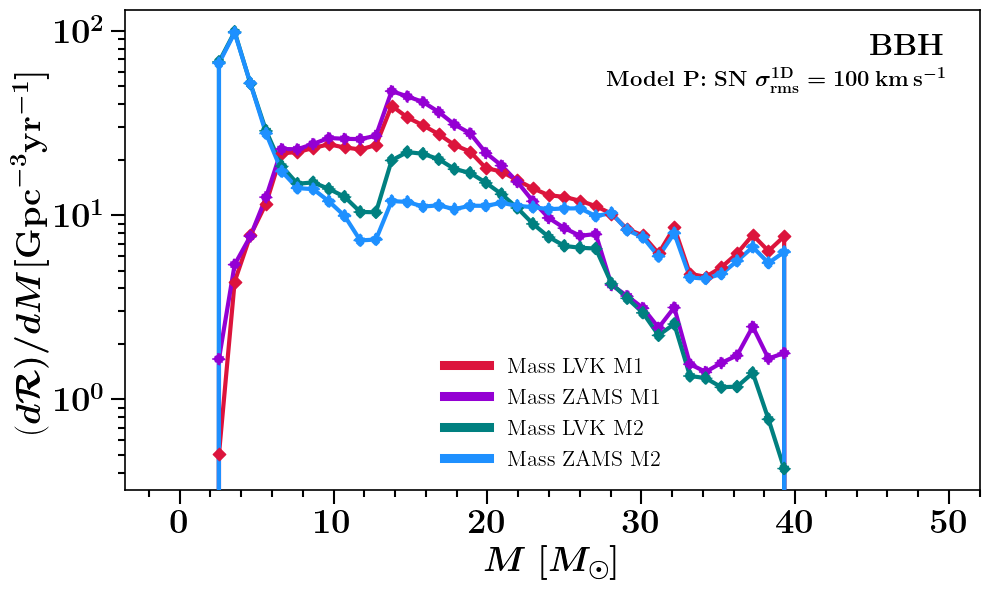


at DCOtype = BBH


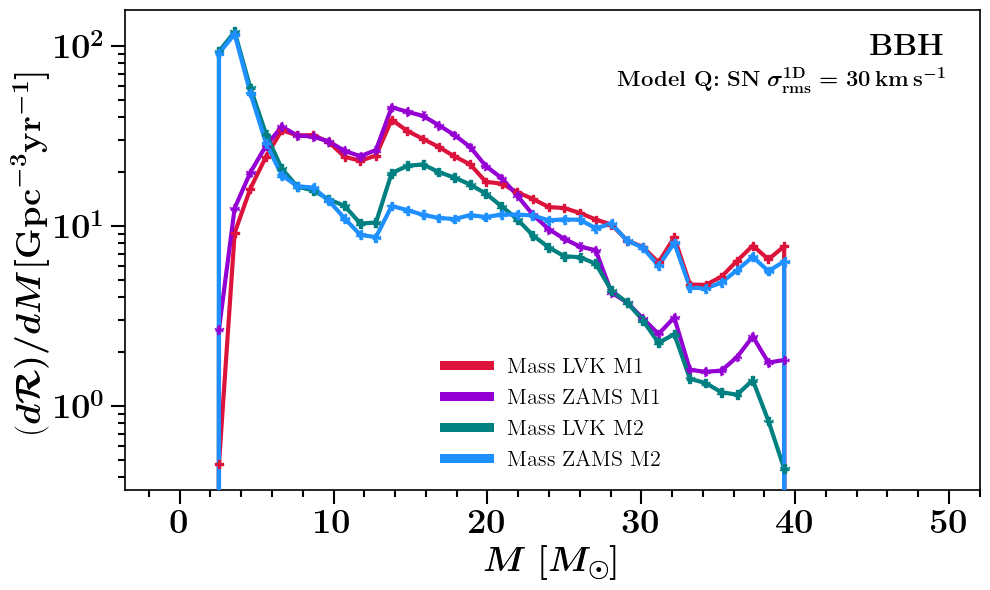


at DCOtype = BBH


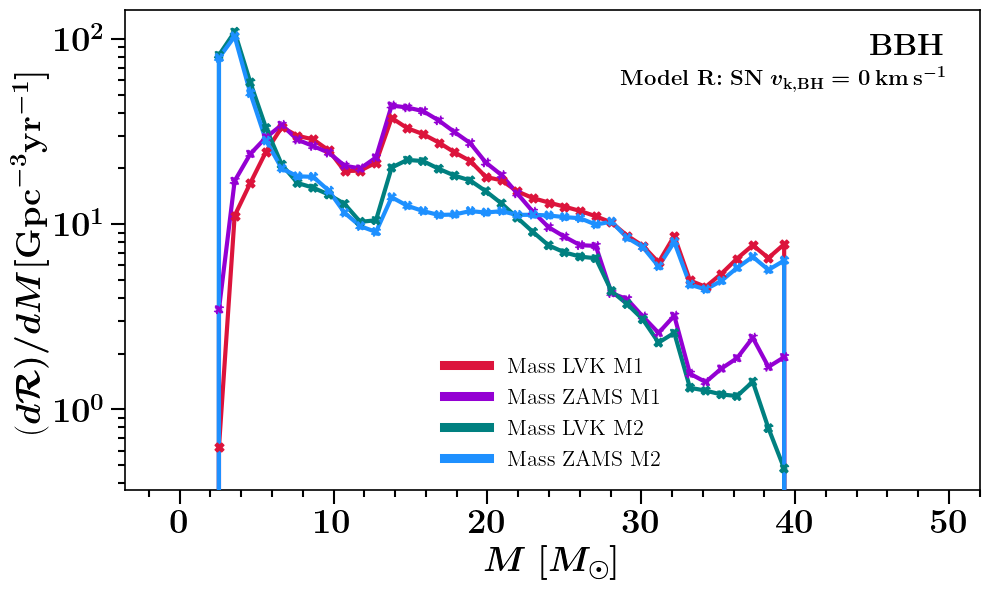


at DCOtype = BBH


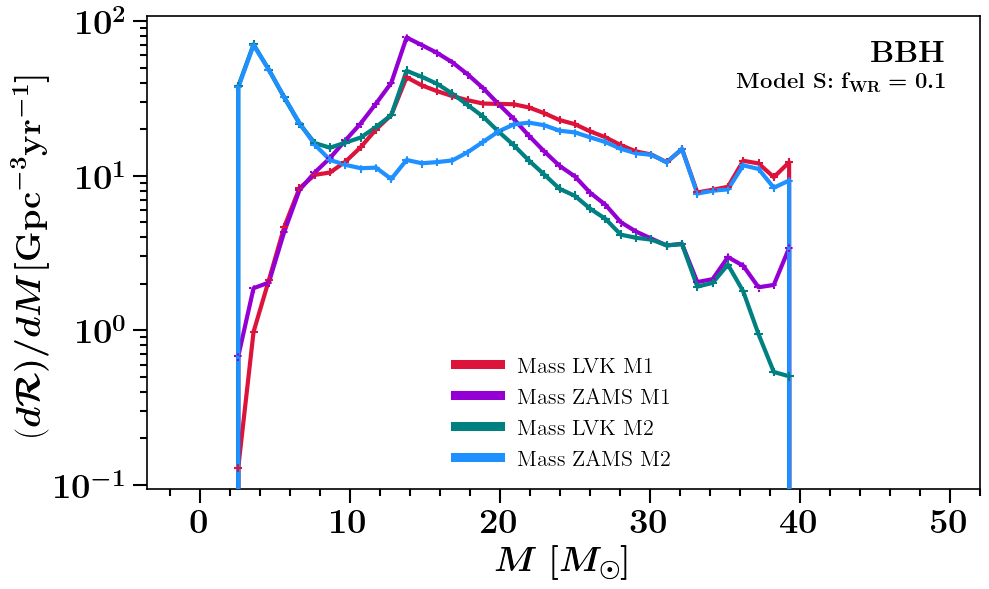


at DCOtype = BBH


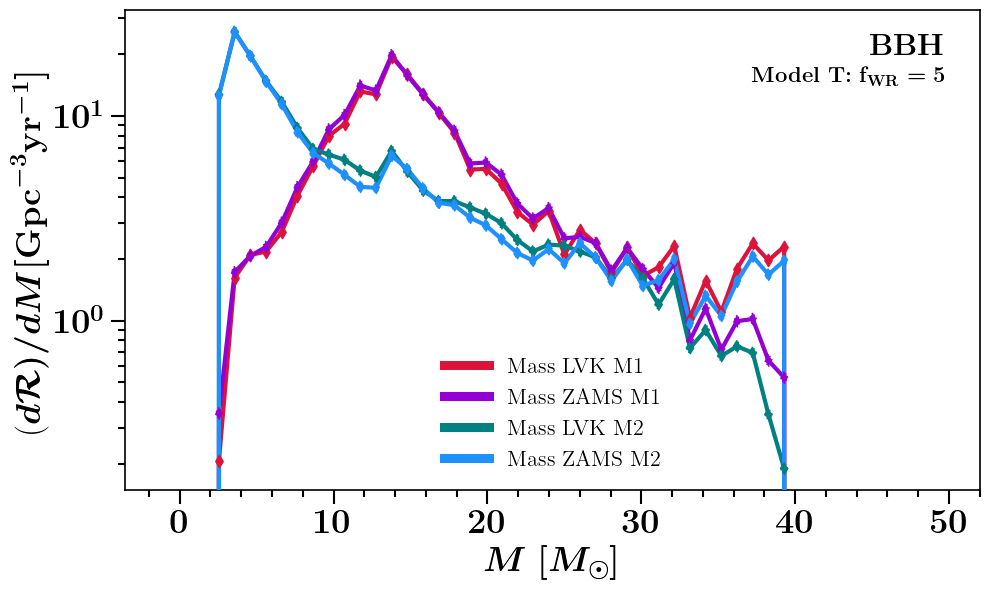

In [46]:



def plot_formation_channels_for_xparam(axe='None', DCOtype='BHBH', BPSmodelName='A', pathData='/Volumes/SimonsFoundation/DataDCO/', xparam='log10_t_delay'):


    
    DCOname = DCOname_dict[DCOtype]

    # path for files 
    full_data_path = pathData + alphabetDirDict[BPSmodelName] +'/COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    fdata = h5.File(full_data_path,'r')     # read in data 
    
#     print('running xparam:', xparam)
    
    massCO_ZAMSM1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
    massCO_ZAMSM2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
    # M1 will be the most massive, M2 the least massive compact object. 
    massCO_LVKM1, massCO_LVKM2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    MassRatioCO_LVK = massCO_LVKM2/massCO_LVKM1
    
    dict_xmin_xmax_res_bin_BBH = {'chirp_mass_LVK':[0,50,  0.4], 'mass_tot':[0,100,0.4], 'mass_ratio_LVK':[0,1,0.02], 'mass_1_LVK':[0,50,  0.4], 'mass_2_LVK':[0,50,  0.4], 't_delay':[-3,np.log10(20), 0.1],\
                                 'M1ZAMS':[8,150, 1], 'M2ZAMS':[8,150, 1],'qZAMS':[0,1,0.025], 'separationInitial':[-3,3, 0.2] }
    dict_xmin_xmax_res_bin_BHNS = {'chirp_mass_LVK':[0,8, 0.2],  'mass_tot':[0,30, 0.5], 'mass_ratio_LVK':[0,1,0.02], 'mass_1_LVK':[0,30,  0.4], 'mass_2_LVK':[0,3,   0.1], 't_delay':[-3,np.log10(20), 0.1],\
                                  'M1ZAMS':[8,150, 1], 'M2ZAMS':[8,70, 1],'qZAMS':[0,1,0.025], 'separationInitial':[-3,3, 0.2]  }
    dict_xmin_xmax_res_bin_BNS = {'chirp_mass_LVK':[0,4,   0.1], 'mass_tot':[0,6,  0.1], 'mass_ratio_LVK':[0,1,0.02], 'mass_1_LVK':[0,3,   0.1], 'mass_2_LVK':[0,3,   0.1],  't_delay':[-3,np.log10(20), 0.1],\
                                 'M1ZAMS':[8,70, 1], 'M2ZAMS':[8,70, 1],'qZAMS':[0,1,0.025], 'separationInitial':[-3,3, 0.2] }
    
    dict_bins = {'BBH':dict_xmin_xmax_res_bin_BBH, 'BHNS':dict_xmin_xmax_res_bin_BHNS, 'BNS':dict_xmin_xmax_res_bin_BNS}
    # make this a dictionary instead !!
    
    dict_to_use = dict_bins[DCOtype]
    xmin, xmax, res_bin = dict_to_use[xparam]
    nbins = int((xmax-xmin)/res_bin + 1)

    
    xbins = np.linspace(xmin, xmax, 50)
    linestyles = ['-', ':', '-.', '--']
    colors = ['crimson', 'darkviolet', 'teal', 'dodgerblue' ]
    
    
    xyz_key = '111' # Star formation history model used, can change this to iterate over all possible options 
    w_key = 'w_' + xyz_key + '_z_0.1923' # at redshift z~0.2 
    weights_ =   fdata['weights_intrinsicPerRedshift'][w_key][...].squeeze()
    
    
    for ind_xparam, xparam in enumerate(['mass_1_LVK', 'massCO_ZAMSM1', 'mass_2_LVK', 'massCO_ZAMSM2']):
        ls_ =  linestyles[ind_xparam]
        cs_xp =  colors[ind_xparam]
    
        if xparam=='chirp_mass_LVK':
            param_x = chirpmass(massCO_LVKM1, massCO_LVKM2)
    #         xmin, xmax, res_bin = 0,50, 0.2

        elif xparam=='mass_ratio_LVK':
            param_x = MassRatioCO_LVK

        elif xparam=='mass_1_LVK':
            param_x = massCO_LVKM1

        elif xparam=='mass_2_LVK':
            param_x = massCO_LVKM2
            
        elif xparam=='massCO_ZAMSM1':
            param_x =massCO_ZAMSM1
        elif xparam=='massCO_ZAMSM2':
            param_x =massCO_ZAMSM2

    
        hist, bin_edges = np.histogram(param_x, bins=xbins, weights=weights_, density=True)
        xbin_centers = (bin_edges[0:-1]+bin_edges[1:])/2         
        xbin_centers_rate = hist * (np.sum(weights_)) # to calculate in [Gpc^-3 yr^-1]

        c_bps = cs_xp

        axe.scatter((xbin_centers), xbin_centers_rate, color=c_bps, marker=dictMarkerShape[BPSmodelName], s=40, zorder=10, ls=ls_) #/norm_classic_tdelay
        axe.plot(   (xbin_centers), xbin_centers_rate, color=c_bps, lw=3, zorder=9) #, ls=linestyles_mssfrind[ind_mssfr_zind])


 
    ylabel = r'$ {M} \ [M_{\odot}]$'
    xlabel =  r'($ d \mathcal{R}) / dM $' +  r'$ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
    
    
#     ylabel = r'$t_{\rm{delay}} \ [\rm{Gyr}]$'
    
    axe = layoutAxes(axe, nameX=ylabel, nameY=xlabel, setMinor=True)
    # set metallicity range
#     axe.set_xlim(-4,-1.7)
#     if xparam in ['t_delay', 'separationInitial']:
#         axe.set_xscale('log')
    
    axe.set_yscale('log')    
    
    ## add label in a legend for plot 
    annotate_label = r'\textbf{%s}'%(DCOtype)        
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
    axe.annotate(annotate_label, xy=(0.96, .95), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)       
    l_ = r'$\textbf{Model %s:}$  %s'%(BPSmodelName, alphabetPhysicalNameDict[BPSmodelName])
    axe.annotate(l_, xy=(0.96, .88), xycoords='axes fraction', fontsize = fs-8, weight = 'bold', ha='right', va="top", zorder=100) 
    
    
    label_legend = ['Mass LVK M1', 'Mass ZAMS M1', 'Mass LVK M2', 'Mass ZAMS M2']
    for ind_xparam, xparam in enumerate(['mass_1_LVK', 'massCO_ZAMSM1', 'mass_2_LVK', 'massCO_ZAMSM2']):
        
        ls_ =  linestyles[ind_xparam]
        cs_xp =  colors[ind_xparam]    
        axe.plot([-1,-1], [-1,-1], lw=6.5, color=cs_xp, label=label_legend[ind_xparam])
        axe.legend(fontsize=16, frameon=False, loc='lower center')
    
    return axe






################ CHANGE THE THINGS BELOW ################
DCOTypeList = ['BBH'] #, https://arxiv.org/pdf/2402.00935.pdf
pathData='/Volumes/SimonsFoundation/DataDCO/'


###########################################################


### ,  'immediate CE',  r'double-core CE', 'other', 'vii'] ,  r'double-core CE', , 'vii'


for xparam_wanted in ['mass_1_LVK']: #, 'M1ZAMS', 'M2ZAMS', 'mass_tot',  'mass_ratio_LVK', 'mass_1_LVK', 'mass_2_LVK','chirp_mass_LVK', 't_delay']:
# for xparam_wanted in [ 't_delay']: #, 'M1ZAMS', 'M2ZAMS']:
    print('at xparam ', xparam_wanted)
    for BPSmodelName in BPSnameslist:
        for DCOtype in DCOTypeList:
            print('at DCOtype =', DCOtype)
            ncols, nrows= 1,1
            f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,6), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

            ax = plot_formation_channels_for_xparam(axe=ax, DCOtype=DCOtype, BPSmodelName=BPSmodelName,pathData=pathData, xparam=xparam_wanted) 


            
            ##  SAVE FIG  ###
            plt.tight_layout()
            plt.subplots_adjust(wspace=0., hspace=0.18)  
            plt.savefig('./MassLVKvsMassZAMS/M1ZAMSvsLVK_' +  DCOtype + '_' + BPSmodelName +'.png', transparent=False, dpi=300)
            plt.show()
            plt.close()
            print()






## make plot medians/quantiles as a function of models 